###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [2]:
#Reading the CSV files
df1 = pd.read_csv('college_1.csv')
df2 = pd.read_csv('college_2.csv')

#Merging them into single dataframe
df = df2.append(df1, ignore_index=True)

#Filling the NaN values with '0'
df.fillna(0, inplace=True)

#Dataframe preview
df.head()

,Name,python,python_en,mysql,computational_thinking,Previous Geekions,CodeKata Score,Department,Rising
0,ASHOK KUMAR K,100.0,0.0,31.0,9.0,19400,19400,Electronics and Electrical Engineering,0
1,Chandru,0.0,20.0,0.0,0.0,14150,14490,Computer Science and Engineering,340
2,Ganesh Ramkumar R,-1.0,55.0,24.0,6.0,8790,10790,Computer Science and Engineering,2000
3,Bodipudi Harini,-1.0,0.0,35.0,-1.0,10040,10040,Electronics and Communication Engineering,0
4,VIINU V P,-1.0,100.0,24.0,-1.0,9150,9150,Electronics and Electrical Engineering,0


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


In [3]:
df[df['CodeKata Score'] >= 15000].to_csv('Exceeded_expectations.csv',index=False)

###### if  10000<codekata score<15000   (Reached_expectations.csv)



In [4]:
df[(df['CodeKata Score'] >= 10000) & (df['CodeKata Score'] < 15000)].to_csv('Reached_expectations.csv',index=False)

###### if  7000<codekata score<10000   (Needs_Improvement.csv)


In [5]:
df[(df['CodeKata Score'] >= 7000) & (df['CodeKata Score'] < 10000)].to_csv('Needs_Improvement.csv',index=False)

###### if  codekate score < 7000        (Unsatisfactory.csv)

In [6]:
df[df['CodeKata Score'] < 7000].to_csv('Unsatisfactory.csv',index=False)

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [7]:
print('Average of Previous Geekions:', round(df['Previous Geekions'].mean(),2))
print('Average of CodeKata Score:', round(df['CodeKata Score'].mean(),2))

Average of Previous Geekions: 3842.35
Average of CodeKata Score: 4051.76


###### No of students participated 

In [8]:
print('No of students participated:', df.shape[0])

No of students participated: 119


###### #Average completion of python course or my_sql or python english or computational thinking

In [9]:
avg = round((df['python'] + df['python_en'] + df['mysql'] + df['computational_thinking']).mean()/4, 2)
print('Average is', avg)

Average is 21.81


###### rising star of the week (top 3 candidate who performed well in that particular week)

In [10]:
http://localhost:8888/notebooks/Assessment.ipynb#rising-star-of-the-week-(top-3-candidate-who-performed-well-in-that-particular-week)df.nlargest(3, 'Rising')

,Name,python,python_en,mysql,computational_thinking,Previous Geekions,CodeKata Score,Department,Rising
8,shifak N,58.0,0.0,0.0,0.0,5180,8320,Electronics and Electrical Engineering,3140
2,Ganesh Ramkumar R,-1.0,55.0,24.0,6.0,8790,10790,Computer Science and Engineering,2000
18,Narasimhan Y L,-1.0,-1.0,0.0,0.0,4800,6800,Computer Science and Engineering,2000


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [11]:
df.nlargest(3, 'Previous Geekions')

,Name,python,python_en,mysql,computational_thinking,Previous Geekions,CodeKata Score,Department,Rising
35,A.Dharani,82.0,0.0,20.0,0.0,24500,24500,Computer Science and Engineering,0
36,V.JEEVITHA,82.0,0.0,20.0,0.0,21740,21740,Computer Science and Engineering,0
37,HEMAVATHI.R,100.0,0.0,100.0,0.0,19680,19680,Computer Science and Engineering,0


###### Department wise codekata performence (pie chart)

Department
Computer Science and Engineering             5079.761905
Electronics and Communication Engineering    2777.820513
Electronics and Electrical Engineering       3164.705882
Name: CodeKata Score, dtype: float64 



Text(0.5, 1.0, 'Average CodeKata Score')

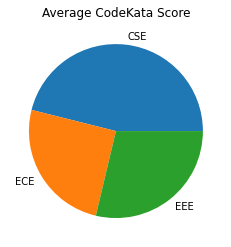

In [12]:
#Finding Department wise average codekata score
department_wise_average_score = df.groupby(['Department'])['CodeKata Score'].mean()

#Printing the result
print(department_wise_average_score, '\n')

#Plotting Pie Chart
plt.pie(department_wise_average_score, labels=['CSE','ECE','EEE'])
plt.title('Average CodeKata Score')

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

Text(0.5, 0, 'CodeKata Score')

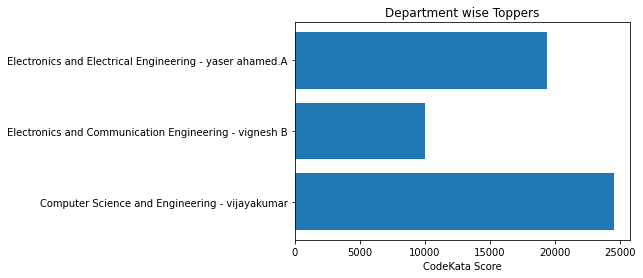

In [13]:
#Finding department wise toppers
toppers = df.groupby(['Department'])[['Name','CodeKata Score']].max()

#Extracting Y-ticks from the dataframe 'toppers'
yticks = []
for i in range(toppers.shape[0]):
  yticks.append(toppers.index[i] + ' - ' + toppers['Name'][i])

#Plotting horizontal bar graph
plt.barh(yticks, toppers['CodeKata Score'])
plt.title('Department wise Toppers')
plt.xlabel('CodeKata Score')